# Method development for geometric functions pt 2: $\beta$ parameters with geometric functions.

- 09/04/20 debugged
- 26/02/20 v1

Aims:

- Develop $\beta_{L,M}$ formalism.
- Develop corresponding numerical methods - see [pt 1 notebook](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_260220_tidy_160320.html).
- Analyse geometric terms - see [pt 1 notebook](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_260220_tidy_160320.html).

## $\beta_{L,M}^{MF}$ rewrite

The various terms defined above can be used to redefine the full MF observables, expressed as a set of $\beta_{L,M}$ coefficients.

The original (full) form for the MF equation, as implemented in `ePSproc.mfblm()` (note this is defined for an expansion in non-conjugate harmonics, $Y_{LM}(\theta_{\hat{k}},\phi_{\hat{k}})$):

\begin{eqnarray}
\beta_{L,-M}^{\mu_{i},\mu_{f}} & = & \sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{M}(-1)^{m}(-1)^{(\mu'-\mu_{0})}\left(\frac{(2l+1)(2l'+1)(2L+1)}{4\pi}\right)^{1/2}\left(\begin{array}{ccc}
l & l' & L\\
0 & 0 & 0
\end{array}\right)\left(\begin{array}{ccc}
l & l' & L\\
-m & m' & -M
\end{array}\right)\nonumber \\
 & \times & \sum_{P,R',R}(2P+1)(-1)^{(R'-R)}\left(\begin{array}{ccc}
1 & 1 & P\\
\mu & -\mu' & R'
\end{array}\right)\left(\begin{array}{ccc}
1 & 1 & P\\
\mu_{0} & -\mu_{0} & R
\end{array}\right)D_{-R',-R}^{P}(R_{\hat{n}})I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(E)
\end{eqnarray}

Where $I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)$ are the energy-dependent dipole matrix elements.

Substituting the terms above (plus some tidying up with phases etc. - see other notes for full derivation):

\begin{eqnarray}
\beta_{L,-M}^{\mu_{i},\mu_{f}} & = & \sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{(\mu'-\mu_{0})}{B_{L,-M}}\nonumber \\
 & \times & \sum_{P,R',R}(2P+1)^{\frac{1}{2}}{E_{P-R}(\hat{e})\Lambda_{R',R}(R_{\hat{n}})}I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(E)
\end{eqnarray}

And can also reorder...

\begin{eqnarray*}
\beta_{L,-M}^{\mu_{i},\mu_{f}} & = & \sum_{P,R',R}(2P+1)^{\frac{1}{2}}{E_{P-R}(\hat{e})}\sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{(\mu'-\mu_{0})}{B_{L,-M}\Lambda_{R',R}(R_{\hat{n}})}I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(E)
\end{eqnarray*}

Add additional (function) labels to track QNs:

\begin{eqnarray*}
\beta_{L,-M}^{\mu_{i},\mu_{f}} & = & \sum_{P,R',R}(2P+1)^{\frac{1}{2}}{E_{P-R}(\hat{e};\mu_{0})}\sum_{l,m,\mu}\sum_{l',m',\mu'}(-1)^{(\mu'-\mu_{0})}{\Lambda_{R',R}(R_{\hat{n}};\mu,P,R,R')B_{L,-M}(l,l',m,m')}I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)I_{l',m',\mu'}^{p_{i}\mu_{i},p_{f}\mu_{f}*}(E)
\end{eqnarray*}


Cf. R\&U rotational wavepacket case, see also Chpt. 12 in Quantum
Met book for similar formalism separating geometric channels:

\begin{equation}
\varUpsilon_{L,M}^{u}=\sum_{ll'}\sum_{\lambda\lambda'}\sum_{mm'}(-1)^{m}\sqrt{\frac{(2l+1)(2l'+1)(2L+1)}{4\pi}}\left(\begin{array}{ccc}
l & l' & L\\
m & -m' & M
\end{array}\right)\left(\begin{array}{ccc}
l & l' & L\\
0 & 0 & 0
\end{array}\right)\gamma_{\alpha_{+}l\lambda ml'\lambda'm'}^{u}\label{eq:geom-channels}
\end{equation}

\begin{equation}
\Lambda^{\zeta\zeta'}=\sum_{\Gamma,\Gamma'}\sum_{\mu,\mu'}\sum_{h,h'}b_{hl\lambda}^{\Gamma\mu*}b_{h'l'\lambda'}^{\Gamma'\mu'}\boldsymbol{D}_{hl}^{\Gamma\mu*}(q,\,k)\boldsymbol{D}_{h'l'}^{\Gamma'\mu'}(q',\,k)
\end{equation}

\begin{equation}
\beta_{L,M}^{u}=\sum_{\zeta,\zeta'}\varUpsilon_{L,M}^{u,\zeta\zeta'}\Lambda^{\zeta\zeta'}
\end{equation}

For details on each term in the tensor product, see the [pt 1 notebook](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_260220_tidy_160320.html).  Here we'll look at the overall result, check for consistency and benchmark.

## Setup

In [1]:
# Imports
import numpy as np
import pandas as pd
import xarray as xr

# Special functions
# from scipy.special import sph_harm
import spherical_functions as sf
import quaternion

# Performance & benchmarking libraries
# from joblib import Memory
# import xyzpy as xyz
import numba as nb

# Timings with ttictoc or time
# https://github.com/hector-sab/ttictoc
from ttictoc import TicToc
import time

# Package fns.
# For module testing, include path to module here
import sys
import os
modPath = r'D:\code\github\ePSproc'  # Win test machine
# modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
sys.path.append(modPath)
import epsproc as ep
# TODO: tidy this up!
# from epsproc.util import matEleSelector
# from epsproc.geomFunc import geomCalc

* pyevtk not found, VTK export not available. 


In [2]:
# Load data from modPath\data
dataPath = os.path.join(modPath, 'data', 'photoionization')
dataFile = os.path.join(dataPath, 'n2_3sg_0.1-50.1eV_A2.inp.out')  # Set for sample N2 data for testing

# Scan data file
dataSet = ep.readMatEle(fileIn = dataFile)
dataXS = ep.readMatEle(fileIn = dataFile, recordType = 'CrossSection')  # XS info currently not set in NO2 sample file.

*** ePSproc readMatEle(): scanning files for DumpIdy segments.

*** Scanning file(s)
['D:\\code\\github\\ePSproc\\data\\photoionization\\n2_3sg_0.1-50.1eV_A2.inp.out']

*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 102 DumpIdy segments.
Found 102 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 102 sets of DumpIdy file segments, (0 blank)
*** ePSproc readMatEle(): scanning files for CrossSection segments.

*** Scanning file(s)
['D:\\code\\github\\ePSproc\\data\\photoionization\\n2_3sg_0.1-50.1eV_A2.inp.out']

*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 3 CrossSection segments.
Found 3 CrossSection segments (sets of results).
Processed 3 sets of Cro

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=r, thres=0.01, with Seaborn


Eke                          0.1        1.1       2.1       3.1       4.1   \
Cont Targ Total l m  mu                                                      
PU   SG   PU    1 -1  1 -6.203556   7.496908  3.926892  1.071093 -0.335132   
                   1 -1 -6.203556   7.496908  3.926892  1.071093 -0.335132   
                3 -1  1 -2.090641  -1.723467 -3.571018 -1.703191  0.232612   
                   1 -1 -2.090641  -1.723467 -3.571018 -1.703191  0.232612   
                5 -1  1  0.000000   0.013246  0.000000 -0.013096 -0.024367   
                   1 -1  0.000000   0.013246  0.000000 -0.013096 -0.024367   
                7 -1  1  0.000000   0.000000  0.000000  0.000000  0.000000   
                   1 -1  0.000000   0.000000  0.000000  0.000000  0.000000   
SU   SG   SU    1  0  0  6.246520 -10.081763 -8.912214 -5.342049 -3.160539   
                3  0  0  2.605768   2.775108  4.733473  1.677812 -1.450830   
                5  0  0  0.000000  -0.020864  0.000000  0.024263  0.042694   
                7  0  0  0.000000   0.000000  0.000000  0.000000  0.000000   

Eke                          5.1       6.1       7.1        8.1        9.1   \
Cont Targ Total l m  mu                                                       
PU   SG   PU    1 -1  1 -1.043391 -1.396885 -1.554984  -1.598812  -1.573327   
                   1 -1 -1.043391 -1.396885 -1.554984  -1.598812  -1.573327   
                3 -1  1  1.862713  3.201022  4.298839   5.198215   5.929303   
                   1 -1  1.862713  3.201022  4.298839   5.198215   5.929303   
                5 -1  1 -0.033455 -0.042762 -0.053765  -0.067354  -0.083946   
                   1 -1 -0.033455 -0.042762 -0.053765  -0.067354  -0.083946   
                7 -1  1  0.000000  0.000000  0.000000   0.000000   0.000000   
                   1 -1  0.000000  0.000000  0.000000   0.000000   0.000000   
SU   SG   SU    1  0  0 -1.795783 -0.867993 -0.174154   0.400643   0.926420   
                3  0  0 -4.187395 -6.554491 -8.601759 -10.343109 -11.747922   
                5  0  0  0.059142  0.077308  0.099330   0.126227   0.157745   
                7  0  0  0.000000  0.000000  0.000000   0.000000   0.000000   

Eke                      ...      41.1      42.1      43.1      44.1  \
Cont Targ Total l m  mu  ...                                           
PU   SG   PU    1 -1  1  ... -0.396306 -0.422225 -0.448003 -0.473466   
                   1 -1  ... -0.396306 -0.422225 -0.448003 -0.473466   
                3 -1  1  ...  1.200463  1.040074  0.892501  0.757189   
                   1 -1  ...  1.200463  1.040074  0.892501  0.757189   
                5 -1  1  ... -0.325544 -0.318791 -0.312332 -0.306211   
                   1 -1  ... -0.325544 -0.318791 -0.312332 -0.306211   
                7 -1  1  ...  0.027469  0.028083  0.028678  0.029257   
                   1 -1  ...  0.027469  0.028083  0.028678  0.029257   
SU   SG   SU    1  0  0  ... -0.854886 -0.940017 -1.021577 -1.099776   
                3  0  0  ... -0.293053 -0.441416 -0.579578 -0.708075   
                5  0  0  ...  0.490499  0.511546  0.531810  0.551281   
                7  0  0  ... -0.039566 -0.041422 -0.043265 -0.045092   

Eke                          45.1      46.1      47.1      48.1      49.1  \
Cont Targ Total l m  mu                                                     
PU   SG   PU    1 -1  1 -0.498463 -0.522867 -0.546573 -0.569493 -0.591558   
                   1 -1 -0.498463 -0.522867 -0.546573 -0.569493 -0.591558   
                3 -1  1  0.633556  0.521004  0.418928  0.326726  0.243800   
                   1 -1  0.633556  0.521004  0.418928  0.326726  0.243800   
                5 -1  1 -0.300456 -0.295091 -0.290130 -0.285584 -0.281453   
                   1 -1 -0.300456 -0.295091 -0.290130 -0.285584 -0.281453   
                7 -1  1  0.029823  0.030377  0.030923  0.031461  0.031994   
                   1 -1  0.029823  0.030377  0.030923  0.031461  0.031994   
SU   SG   SU    1  0 

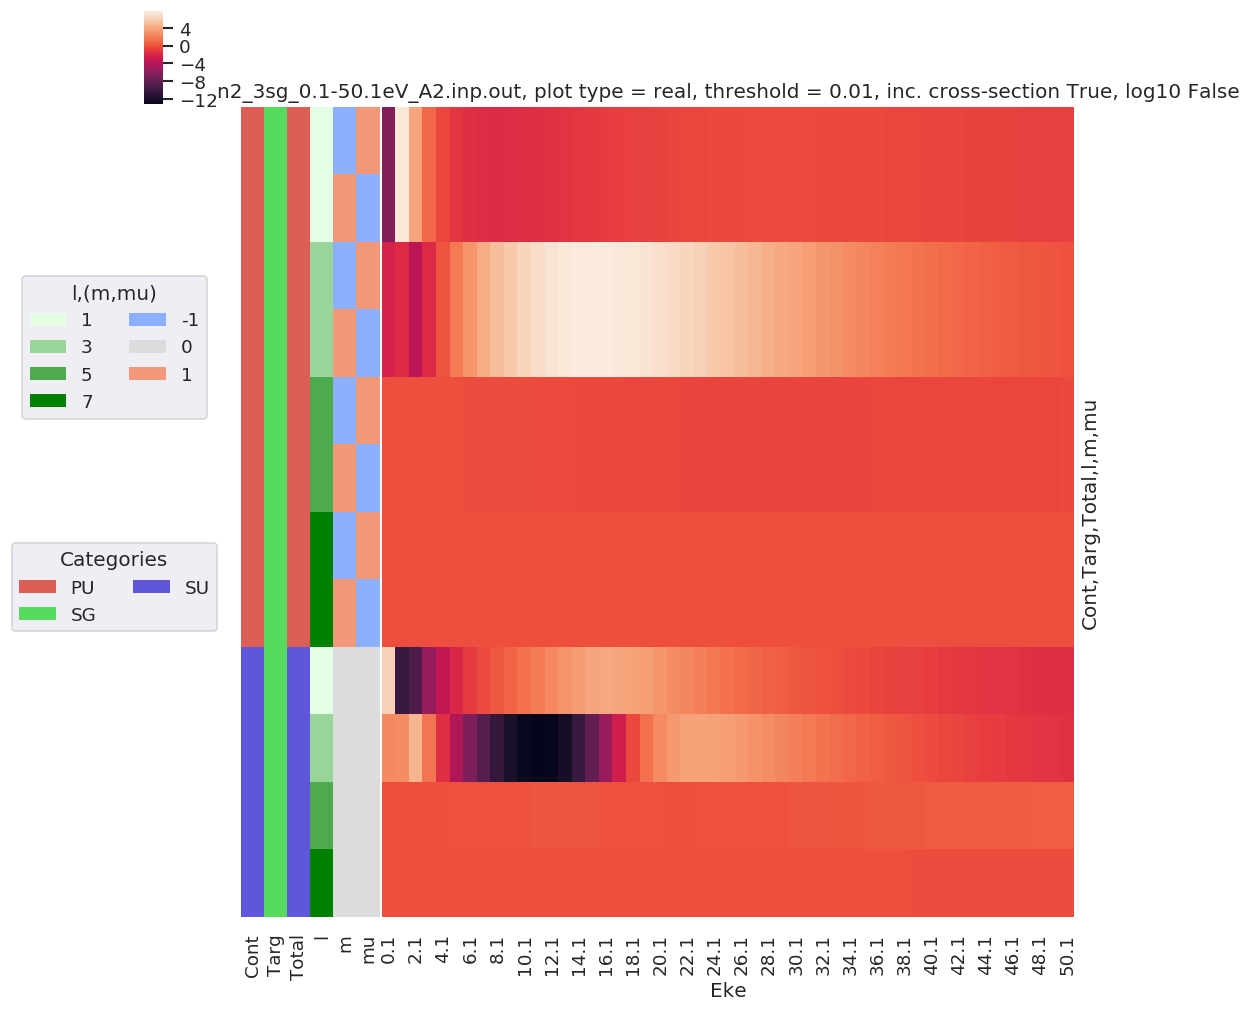

In [3]:
# Tabulate & plot matrix elements vs. Eke
selDims = {'it':1, 'Type':'L'}
matE = dataSet[0].sel(selDims)  # Set for N2 case, length-gauge results only.
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(matE, xDim = 'Eke', pType = 'r', fillna = True)
daPlotpd

## Numerics

The tensor product is currenty implemented in `mfblmXprod`, making use of direct multiplication of Xarrays corresponding to each term in the eqns.  (As of mid-March 2020, it still needs a bit of work, but is basically working.) See [pt 1 for more details of the component tensors](https://epsproc.readthedocs.io/en/dev/methods/geometric_method_dev_260220_090420_tidy.html).

This is easy to follow, and relatively fast, although can be RAM heavy for large sets of matrix elements (despite the relatively sparse arrays). Parallelization is not yet implemented, but should be fairly easy using [Xarray's GroupBy functionality](http://xarray.pydata.org/en/stable/groupby.html). Fast functions are [used on the back-end](https://epsproc.readthedocs.io/en/dev/tests/Low_level_bench_tests_Wigner3j_Feb2020.html), although there is likely some significant speed-ups to be had by making use of GPU methods here (and in the tensor handling) - this will be necessary for larger problems, e.g. fitting data.

Note - quite a bit of the processing is currently due to slow selection/thresholding routines, so there is also some improvements to be made there.

Timing benchmarks are from an AMD Threadripper 1950X workstation (single core only).

### Without symmetry summation
Treat continua separately.

In [4]:
phaseConvention = 'E'  # Set phase conventions used in the numerics - for ePolyScat matrix elements, set to 'E', to match defns. above.

symSum = False  # Sum over symmetry groups, or keep separate?
SFflag = True  # Include scaling factor to Mb in calculation?
thres = 1e-4
RX = ep.setPolGeoms()  # Set default pol geoms (z,x,y), or will be set by mfblmXprod() defaults

start = time.time()
mTermST, mTermS, mTermTest = ep.geomFunc.mfblmXprod(dataSet[0], QNs = None, thres = thres, selDims = {'it':1, 'Type':'L'}, thresDims='Eke', RX=RX, symSum=symSum, SFflag=True, phaseConvention=phaseConvention)
end = time.time()
print('Elapsed time = {0} seconds, for {1} energy points, {2} polarizations, threshold={3}.'.format((end-start), mTermST.Eke.size, RX.size, thres))

# Elapsed time = 3.3885273933410645 seconds, for 51 energy points, 3 polarizations, threshold=0.01.
# Elapsed time = 5.059587478637695 seconds, for 51 energy points, 3 polarizations, threshold=0.0001.

Elapsed time = 5.059587478637695 seconds, for 51 energy points, 3 polarizations, threshold=0.0001.


Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=r, thres=0.01, with Seaborn


No handles with labels found to put in legend.


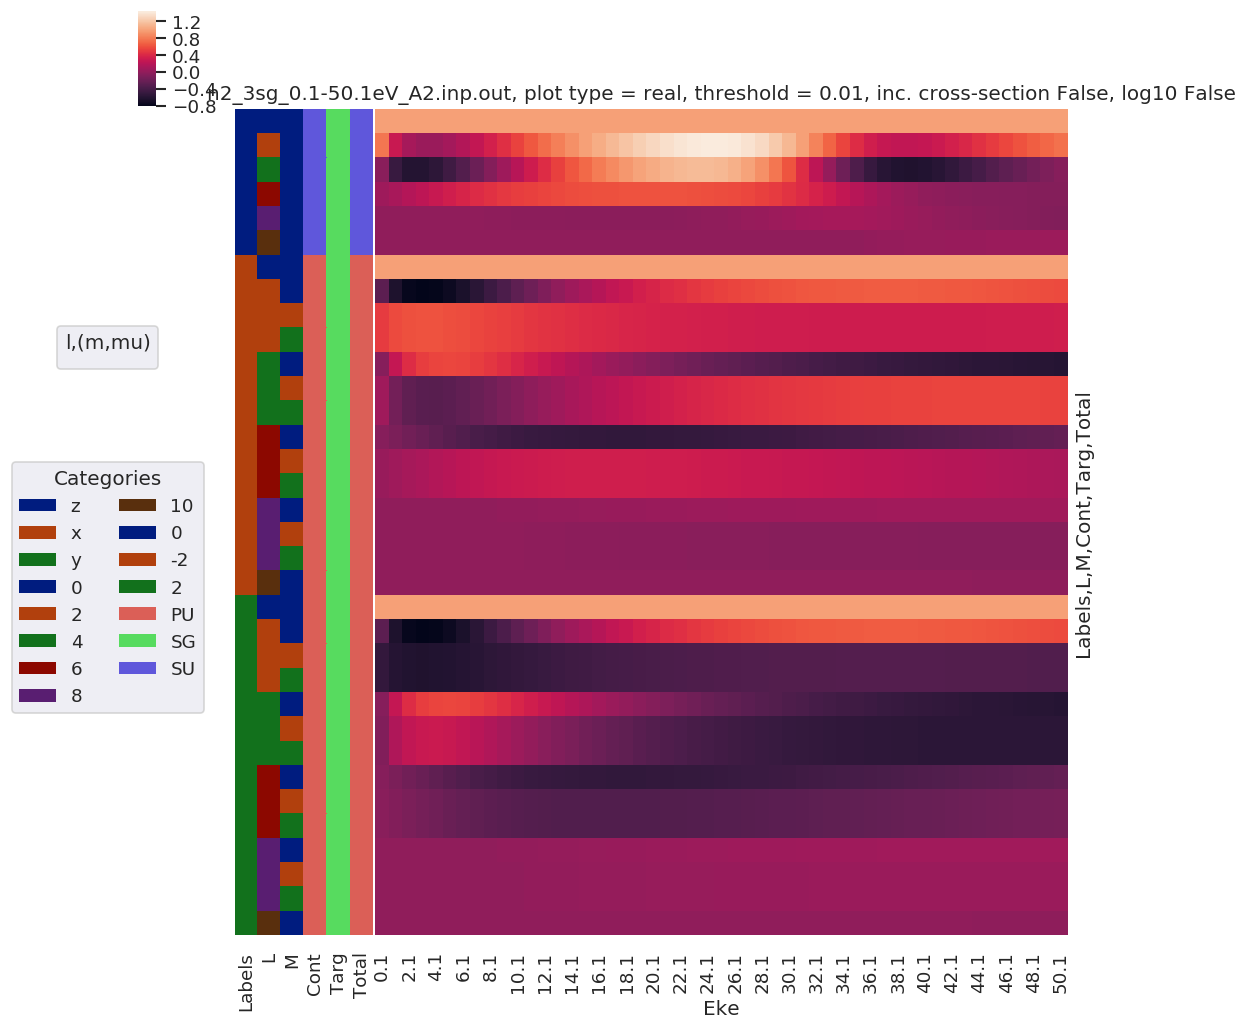

In [5]:
# Full results (before summation)
mTermST.attrs['dataType'] = 'matE'  # Set matE here to allow for correct plotting of sym dims.

plotDimsRed = ['Labels','L','M']  # Set plotDims to fix dim ordering in plot
if not symSum:
    plotDimsRed.extend(['Cont','Targ','Total'])
    
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(mTermST, plotDims=plotDimsRed, xDim='Eke', sumDims=None, pType = 'r', thres = 0.01, fillna = True, SFflag=False)  

# daPlot, daPlotpd, legendList, gFig = ep.lmPlot(mTermST, xDim='Eke', sumDims=None, pType = 'r', thres = 0.01, fillna = True)  # If plotDims is not passed use default ordering.

In [6]:
# Tabulate complex values...
mTermSTpd, _ = ep.util.multiDimXrToPD(mTermST, colDims='Eke', thres = thres)
mTermSTpd

Eke                                         0.1                 1.1   \
Cont L  Labels M  Targ Total                                           
PU   0  x       0 SG   PU     1.000000-0.000000j  1.000000-0.000000j   
        y       0 SG   PU     1.000000-0.000000j  1.000000-0.000000j   
     2  x       0 SG   PU    -0.272711-0.000000j -0.638474-0.000000j   
               -2 SG   PU     0.512102-0.000000j  0.586763+0.000000j   
                2 SG   PU     0.512102-0.000000j  0.586763+0.000000j   
        y       0 SG   PU    -0.272711+0.000000j -0.638474-0.000000j   
               -2 SG   PU    -0.512102+0.000000j -0.586763+0.000000j   
                2 SG   PU    -0.512102-0.000000j -0.586763-0.000000j   
     4  x       0 SG   PU    -0.059474-0.000000j  0.271217+0.000000j   
               -2 SG   PU     0.080503-0.000000j -0.153387-0.000000j   
                2 SG   PU     0.080503-0.000000j -0.153387-0.000000j   
        y       0 SG   PU    -0.059474-0.000000j  0.271217+0.000000j   
               -2 SG   PU    -0.080503+0.000000j  0.153387-0.000000j   
                2 SG   PU    -0.080503+0.000000j  0.153387+0.000000j   
     6  x       0 SG   PU    -0.058944+0.000000j -0.107815-0.000000j   
               -2 SG   PU     0.040201-0.000000j  0.073410+0.000000j   
                2 SG   PU     0.040201-0.000000j  0.073410+0.000000j   
        y       0 SG   PU    -0.058944+0.000000j -0.107815-0.000000j   
               -2 SG   PU    -0.040201+0.000000j -0.073410+0.000000j   
                2 SG   PU    -0.040201-0.000000j -0.073410-0.000000j   
     8  x       0 SG   PU     0.000181-0.000000j  0.000676+0.000000j   
               -2 SG   PU    -0.000115-0.000000j -0.000427-0.000000j   
                2 SG   PU    -0.000115-0.000000j -0.000427-0.000000j   
        y       0 SG   PU     0.000181-0.000000j  0.000676+0.000000j   
               -2 SG   PU     0.000115-0.000000j  0.000427-0.000000j   
                2 SG   PU     0.000115-0.000000j  0.000427+0.000000j   
     10 x       0 SG   PU                    NaN                 NaN   
               -2 SG   PU                    NaN                 NaN   
                2 SG   PU                    NaN                 NaN   
        y       0 SG   PU                    NaN                 NaN   
               -2 SG   PU                    NaN                 NaN   
                2 SG   PU                    NaN                 NaN   
     12 x       0 SG   PU                    NaN                 NaN   
               -2 SG   PU                    NaN                 NaN   
                2 SG   PU                    NaN                 NaN   
        y       0 SG   PU                    NaN                 NaN   
               -2 SG   PU                    NaN                 NaN   
                2 SG   PU                    NaN                 NaN   
SU   0  z       0 SG   SU     1.000000-0.000000j  1.000000-0.000000j   
     2  z       0 SG   SU     0.784764-0.000000j  0.292636+0.000000j   
     4  z       0 SG   SU    -0.040643+0.000000j -0.472493-0.000000j   
     6  z       0 SG   SU     0.067996+0.000000j  0.124559+0.000000j   
     8  z       0 SG   SU    -0.000240-0.000000j -0.000812-0.000000j   
     10 z       0 SG   SU                    NaN                 NaN   
     12 z       0 SG   SU                    NaN                 NaN   
     14 z       0 SG   SU                    NaN                 NaN   

Eke                                         2.1                 3.1   \
Cont L  Labels M  Targ Total                                           
PU   0  x       0 SG   PU     1.000000-0.000000j  1.000000-0.000000j   
        y       0 SG   PU     1.000000-0.000000j  1.000000-0.000000j   
     2  x       0 SG   PU    -0.775003-0.000000j -0.814436-0.000000j   
               -2 SG   PU     0.614632-0.000000j  0.622681-0.000000j   
                2 SG   PU     0.614632-0.000000j  0.622681-0.000000j   
        y       0 SG   PU    -0.775003-

Here all the $\beta_{LM}$ are normalised, hence the X-sections are unity. For the $N_2$ case ([linear, $D_{\infty h}$ symmetry](https://en.wikipedia.org/wiki/Molecular_symmetry)), note the correlation of symmetry groups with polarization geometries (SU > z; PU > x,y).

As a further test, we can check abs terms x pol == y pol - there should only be a rotation (phase) difference between the results for these polarization geometries

In [7]:
testSub = mTermST.sel({'Labels':'x'}).pipe(np.abs) - mTermST.sel({'Labels':'y'}).pipe(np.abs)

print(f"Min difference: {testSub.min().data}, max difference: {testSub.max().data}")

Min difference: -3.3306690738754696e-16, max difference: 3.3306690738754696e-16


The X-sections are stored sepearately in the output Xarray:

C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\xarray\plot\plot.py:86: FutureWarning:

This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.



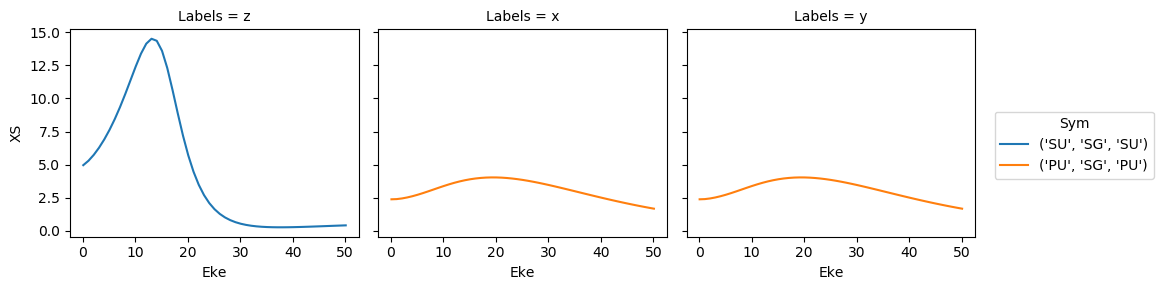

In [8]:
mTermST.XS.real.squeeze().plot.line(x='Eke', col='Labels');

### With symmetry summation

This produces simpler results, summed over continua.

In [9]:
symSum = True  # Sum over symmetry groups, or keep separate?

start = time.time()
mTermST, mTermS, mTermTest = ep.geomFunc.mfblmXprod(dataSet[0], QNs = None, thres = thres, selDims = {'it':1, 'Type':'L'}, thresDims='Eke', RX=RX, symSum=symSum, SFflag=True, phaseConvention=phaseConvention)
end = time.time()
print('Elapsed time = {0} seconds, for {1} energy points, {2} polarizations, threshold={3}.'.format((end-start), mTermST.Eke.size, RX.size, thres))

# Elapsed time = 1.704383134841919 seconds, for 51 energy points, 3 polarizations, threshold=threshold=0.01.
# Elapsed time = 3.151679754257202 seconds, for 51 energy points, 3 polarizations, threshold=0.0001.

Elapsed time = 3.151679754257202 seconds, for 51 energy points, 3 polarizations, threshold=0.0001.


Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=r, thres=0.01, with Seaborn


No handles with labels found to put in legend.


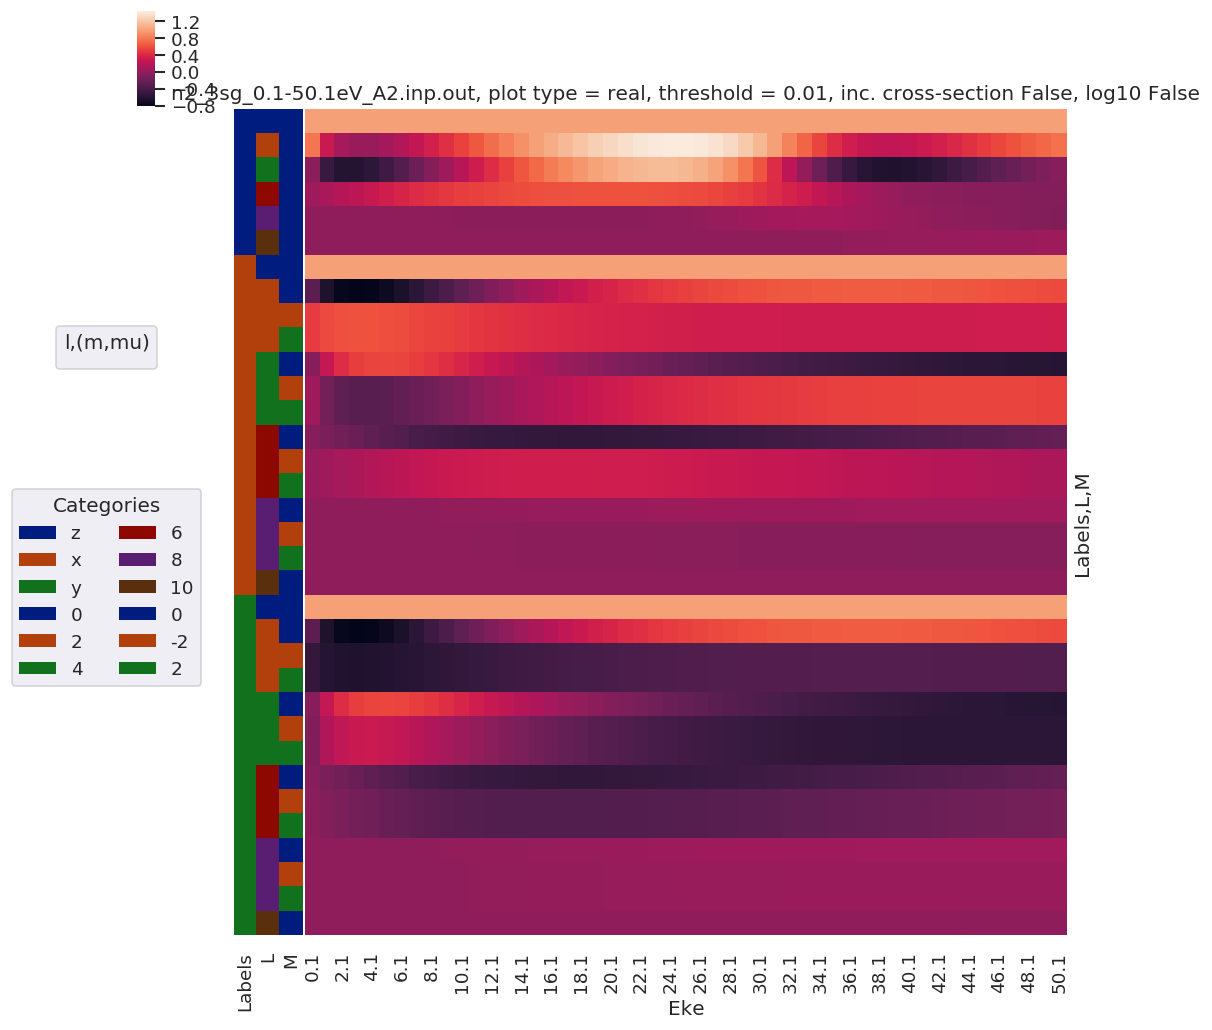

In [10]:
# Full results (before summation)
mTermST.attrs['dataType'] = 'matE'  # Set matE here to allow for correct plotting of sym dims.

plotDimsRed = ['Labels','L','M']  # Set plotDims to fix dim ordering in plot
if not symSum:
    plotDimsRed.extend(['Cont','Targ','Total'])
    
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(mTermST, plotDims=plotDimsRed, xDim='Eke', sumDims=None, pType = 'r', thres = 0.01, fillna = True, SFflag=False)  

# daPlot, daPlotpd, legendList, gFig = ep.lmPlot(mTermST, xDim='Eke', sumDims=None, pType = 'r', thres = 0.01, fillna = True)  # If plotDims is not passed use default ordering.

In [11]:
# Tabulate complex values...
mTermSTpd, _ = ep.util.multiDimXrToPD(mTermST, colDims='Eke', thres = thres)
mTermSTpd

Eke                         0.1                 1.1                 2.1   \
L  Labels M                                                                
0  z       0  1.000000-0.000000j  1.000000-0.000000j  1.000000-0.000000j   
   x       0  1.000000-0.000000j  1.000000-0.000000j  1.000000-0.000000j   
   y       0  1.000000-0.000000j  1.000000-0.000000j  1.000000-0.000000j   
2  z       0  0.784764-0.000000j  0.292636+0.000000j  0.110286-0.000000j   
   x       0 -0.272711-0.000000j -0.638474-0.000000j -0.775003-0.000000j   
          -2  0.512102-0.000000j  0.586763+0.000000j  0.614632-0.000000j   
           2  0.512102-0.000000j  0.586763+0.000000j  0.614632-0.000000j   
   y       0 -0.272711+0.000000j -0.638474-0.000000j -0.775003-0.000000j   
          -2 -0.512102+0.000000j -0.586763+0.000000j -0.614632+0.000000j   
           2 -0.512102-0.000000j -0.586763-0.000000j -0.614632-0.000000j   
4  z       0 -0.040643+0.000000j -0.472493-0.000000j -0.596717-0.000000j   
   x       0 -0.059474-0.000000j  0.271217+0.000000j  0.432955-0.000000j   
          -2  0.080503-0.000000j -0.153387-0.000000j -0.252803-0.000000j   
           2  0.080503-0.000000j -0.153387-0.000000j -0.252803-0.000000j   
   y       0 -0.059474-0.000000j  0.271217+0.000000j  0.432955+0.000000j   
          -2 -0.080503+0.000000j  0.153387-0.000000j  0.252803-0.000000j   
           2 -0.080503+0.000000j  0.153387+0.000000j  0.252803+0.000000j   
6  z       0  0.067996+0.000000j  0.124559+0.000000j  0.181056-0.000000j   
   x       0 -0.058944+0.000000j -0.107815-0.000000j -0.158159+0.000000j   
          -2  0.040201-0.000000j  0.073410+0.000000j  0.107661+0.000000j   
           2  0.040201-0.000000j  0.073410+0.000000j  0.107661+0.000000j   
   y       0 -0.058944+0.000000j -0.107815-0.000000j -0.158159-0.000000j   
          -2 -0.040201+0.000000j -0.073410+0.000000j -0.107661+0.000000j   
           2 -0.040201-0.000000j -0.073410-0.000000j -0.107661-0.000000j   
8  z       0 -0.000240-0.000000j -0.000812-0.000000j -0.001227-0.000000j   
   x       0  0.000181-0.000000j  0.000676+0.000000j  0.001048+0.000000j   
          -2 -0.000115-0.000000j -0.000427-0.000000j -0.000665+0.000000j   
           2 -0.000115-0.000000j -0.000427-0.000000j -0.000665+0.000000j   
   y       0  0.000181-0.000000j  0.000676+0.000000j  0.001048+0.000000j   
          -2  0.000115-0.000000j  0.000427-0.000000j  0.000665-0.000000j   
           2  0.000115-0.000000j  0.000427+0.000000j  0.000665-0.000000j   
10 z       0                 NaN                 NaN                 NaN   
   x       0                 NaN                 NaN                 NaN   
          -2                 NaN                 NaN                 NaN   
           2                 NaN                 NaN                 NaN   
   y       0                 NaN                 NaN                 NaN   
          -2                 NaN                 NaN                 NaN   
           2                 NaN                 NaN                 NaN   
12 z       0                 NaN                 NaN                 NaN   
   x       0                 NaN                 NaN                 NaN   
          -2                 NaN                 NaN                 NaN   
           2                 NaN                 NaN                 NaN   
   y       0                 NaN                 NaN                 NaN   
          -2                 NaN                 NaN                 NaN   
           2                 NaN                 NaN                 NaN   
14 z       0                 NaN                 NaN                 NaN   

Eke                         3.1                 4.1                 5.1   \
L  Labels M                                                                
0  z       0  1.000000-0.000000j  1.000000-0.000000j  1.000000-0.000000j   
   x       0  1.000000-0.000000j  1.000000-0.000000j  1.000000-0.000000j   
   y       0  1.000000-0.000000j  1.000000-0.00

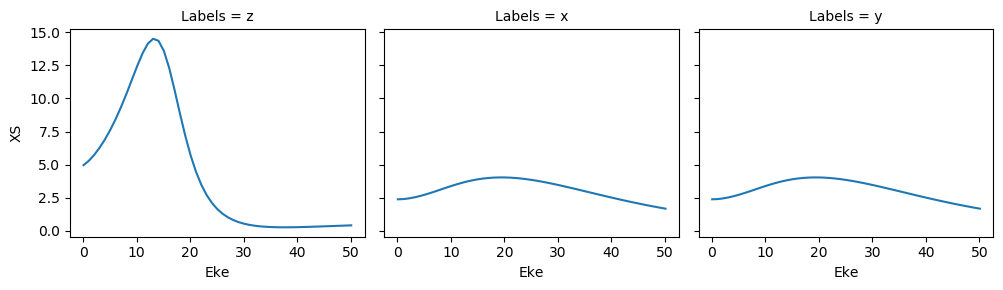

In [12]:
mTermST.XS.real.squeeze().plot.line(x='Eke', col='Labels');

## Verification - test vs. existing calcs

The [existing method](https://epsproc.readthedocs.io/en/dev/demos/ePSproc_BLM_calc_demo_Sept2019.html), implemented in `mfblm()`, makes use of a set of nested loops; this is far from optimal and rather slow (although could be sped up with parallel methods).

In [13]:
daIn = dataSet[0].copy()

# BLMXeN2 = ep.mfblm(daIn[:, 1:4], selDims = {'Type':'L'}, thres = 1e-4)       # Subselected on Eke
start = time.time()
BLMXeN2 = ep.mfblm(daIn, selDims = selDims, thres = thres, verbose = False)   # Run for all Eke. Note this fails if selDims = None, to fix!
end = time.time()
print('Elapsed time = {0} seconds, for {1} energy points, single pol geom, thres={2}.'.format((end-start), BLMXeN2.Eke.size, thres))

Elapsed time = 25.497477531433105 seconds, for 51 energy points.


In [14]:
# Set standard pol geoms (== (z,x,y) as used above)
eAngs = ep.setPolGeoms()

# Calculate for each pol geom
start = time.time()
BLM = ep.mfblmEuler(dataSet[0], selDims=selDims, eAngs = eAngs, thres = thres, SFflag = True, verbose = 0)  # Run for all Eke.  Note this fails if selDims = None, to fix!
end = time.time()
print('Elapsed time = {0} seconds, for {1} energy points, {2} polarisations, threshold={3}.'.format((end-start), BLM.Eke.size, eAngs.size, thres))

# Elapsed time = 35.40217471122742 seconds, for 51 energy points, 3 polarisations, threshold=0.01.
# Elapsed time = 77.12336850166321 seconds, for 51 energy points, 3 polarisations, threshold=0.0001.

Elapsed time = 77.12336850166321 seconds, for 51 energy points, 3 polarisations, threshold=0.0001.


Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


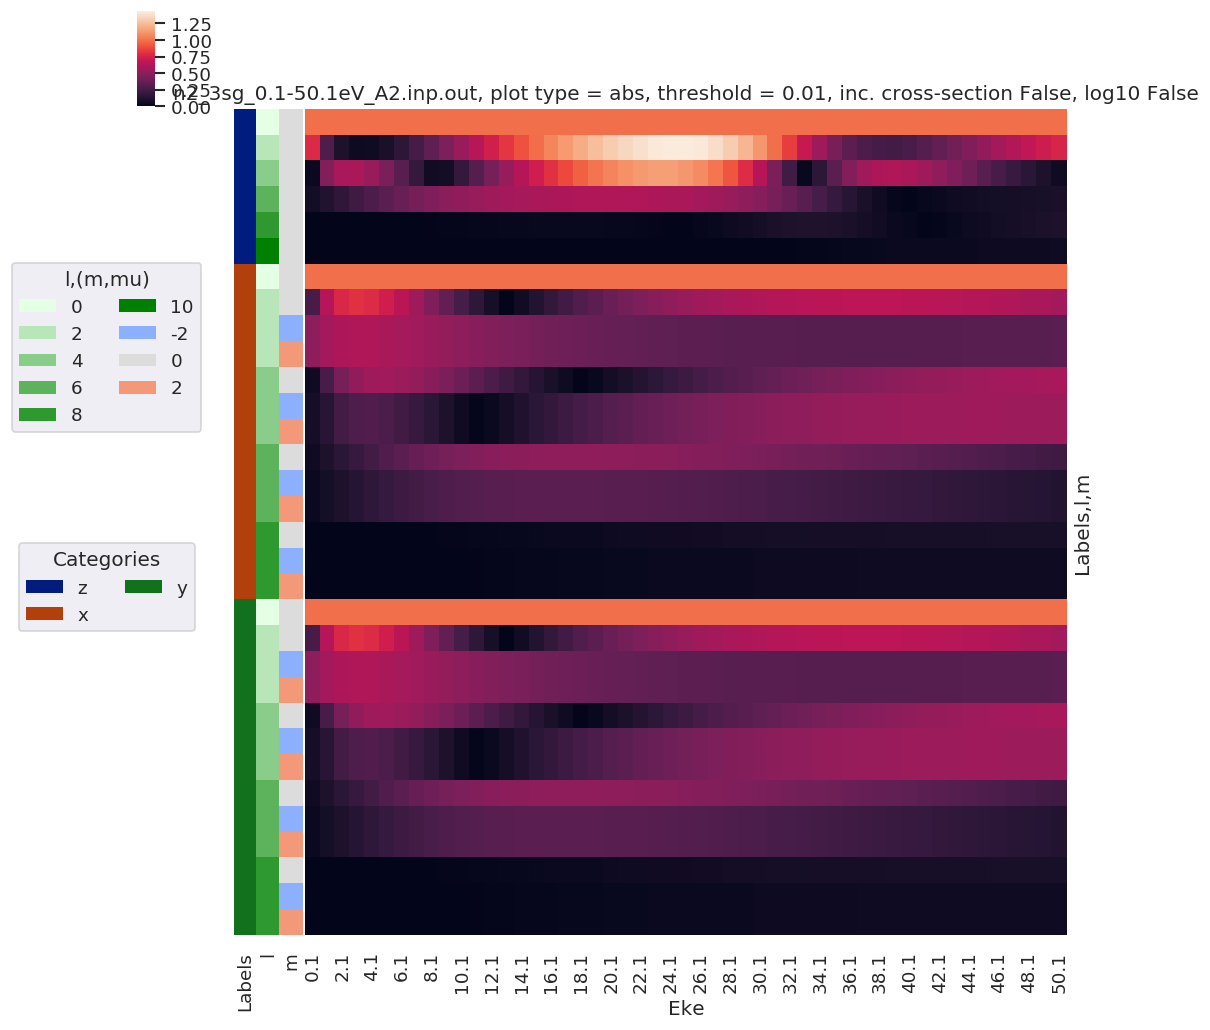

In [15]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLM.swap_dims({'Euler':'Labels'}), SFflag = False, eulerGroup = True, fillna = True)

In [16]:
BLMrename = BLM.swap_dims({'Euler':'Labels'}).unstack('BLM').rename({'l':'L','m':'M'}).stack({'LM':['L','M']})  # Reformat Xarray
testSub = mTermST - BLMrename
testSub.attrs['dataType']='matE'

In [17]:
print(f"Min difference: {testSub.min().data}, max difference: {testSub.max().data}, threshold: {thres}")

# For thres = 1e-4, max diff = 0.0289
# For thres = 1e-2, max diff = 0.3781

Min difference: (-0.01001260432521213-1.9073640679125083e-17j), max difference: (0.02883058068349678+1.7578510363291103e-17j), threshold: 0.0001


TODO: Difference is >theshold here, so need to check differences in more detail. Due to difference in thresholding and accumulation in fns?

Plotting data (No filename), pType=a, thres=None, with Seaborn


No handles with labels found to put in legend.


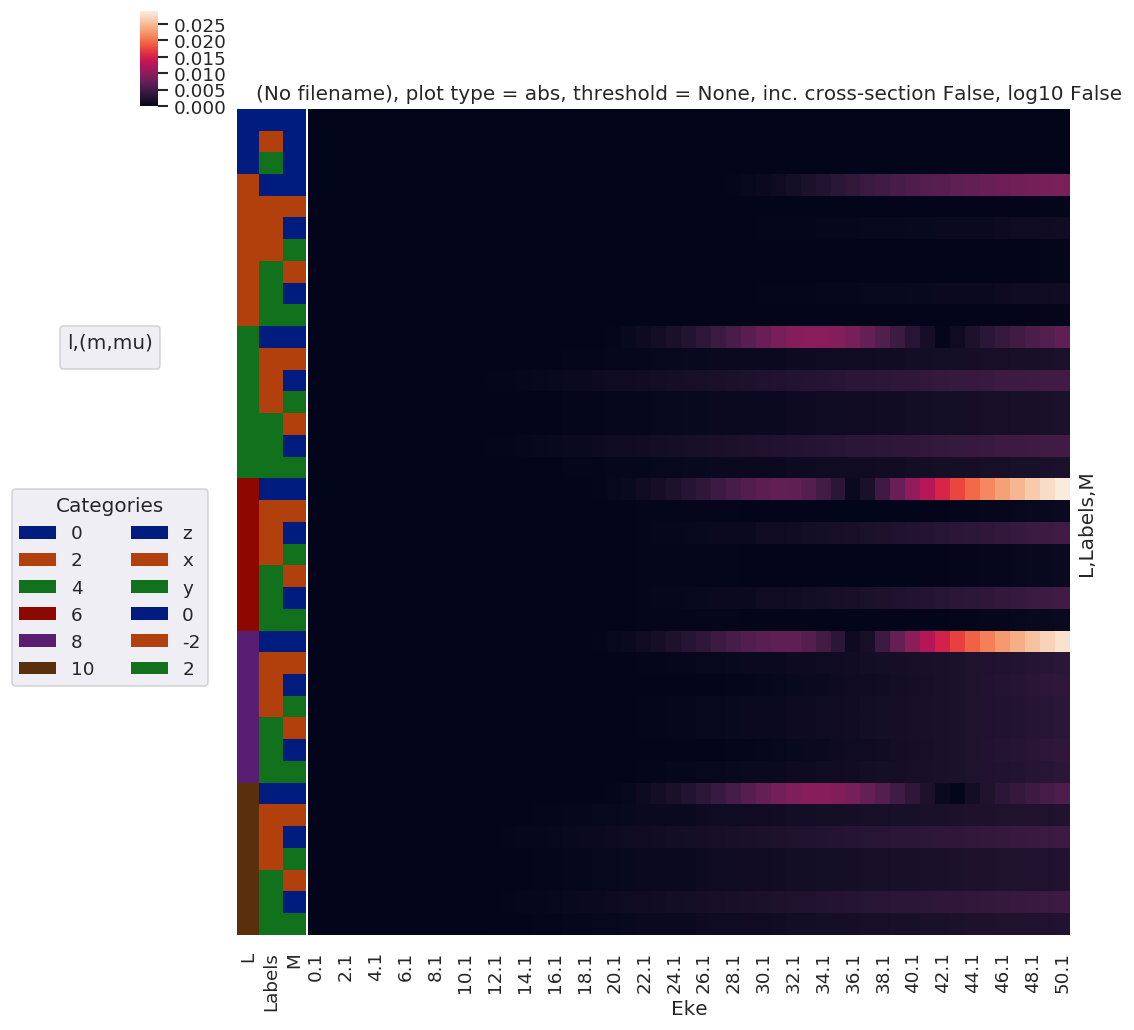

In [18]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(testSub, xDim='Eke', SFflag = False, fillna = True, thres = None)

In [19]:
# Check pol geoms as before
testSubXY = mTermST.sel({'Labels':'x'}).pipe(np.abs) - mTermST.sel({'Labels':'y'}).pipe(np.abs)

print(f"Min difference: {testSubXY.min().data}, max difference: {testSubXY.max().data}")

Min difference: -3.3306690738754696e-16, max difference: 3.3306690738754696e-16


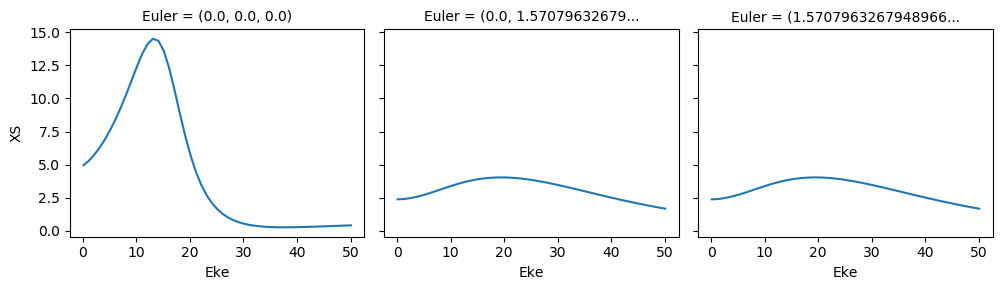

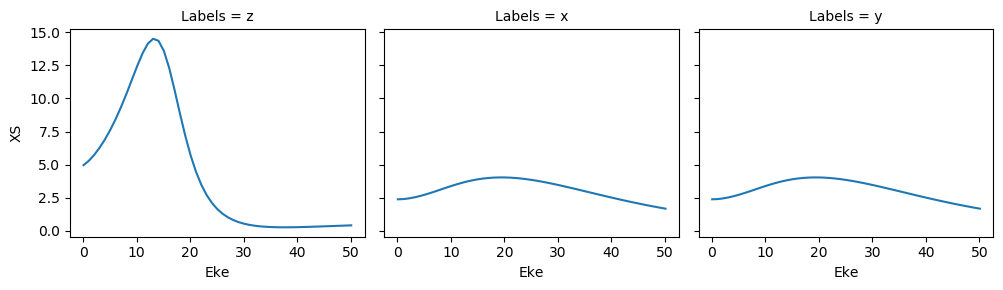

In [20]:
# Normalize and plot results - Original mfblm() results vs. geomFunc case
BLM.XS.real.squeeze().plot.line(x='Eke', col='Euler');
# mTermST.XS.sum(['Cont', 'Total']).real.squeeze().plot.line(x='Eke', col='Labels');
mTermST.XS.real.squeeze().plot.line(x='Eke', col='Labels');

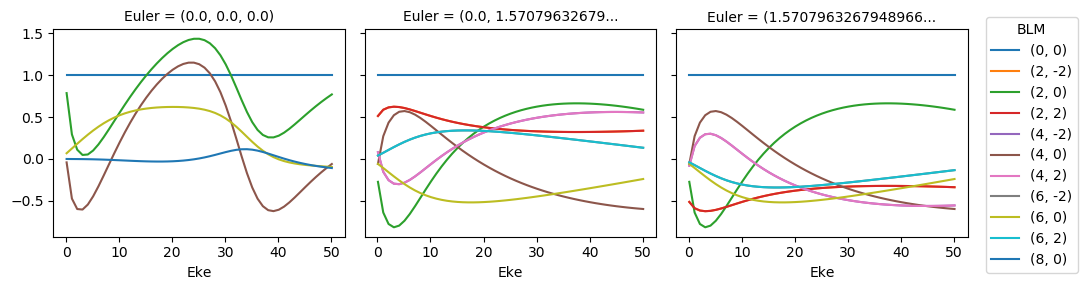

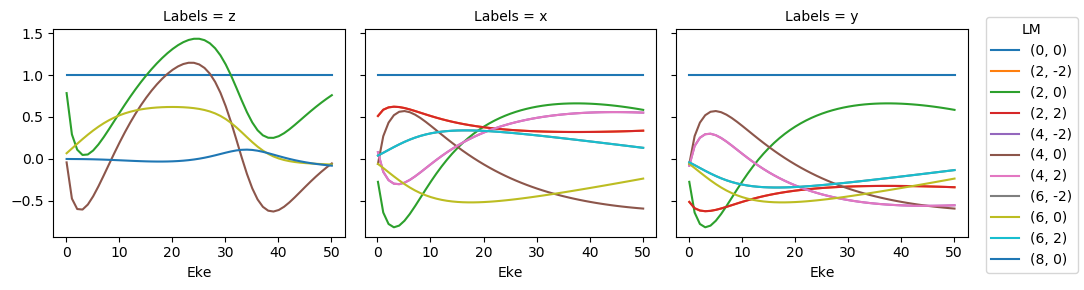

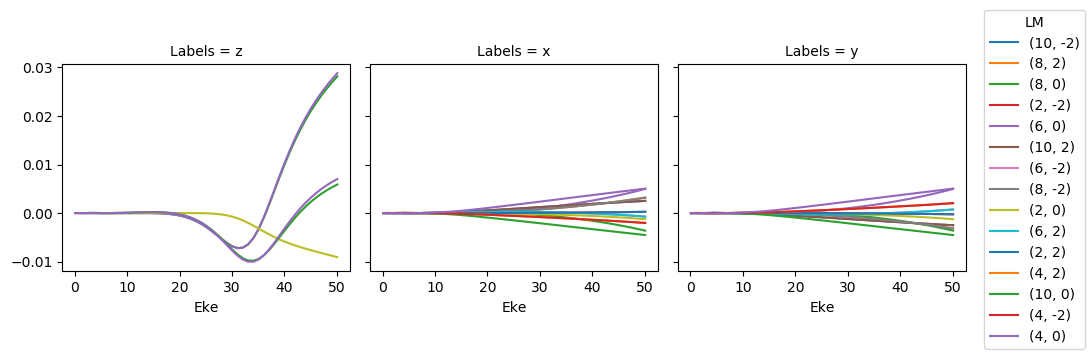

In [21]:
# Normalize and plot results - BLM values vs. polarisation geometry
ep.util.matEleSelector(BLM, thres = 0.1, dims='Eke').real.squeeze().plot.line(x='Eke', col='Euler');
ep.util.matEleSelector(mTermST, thres = 0.1, dims='Eke').real.squeeze().plot.line(x='Eke', col='Labels');

# Replot differences as before - looks like E-dependence, so likely handling of SF (scale factor) is the issue here.
ep.util.matEleSelector(testSub, thres = 1e-4, dims='Eke').real.squeeze().plot.line(x='Eke', col='Labels');